In [ ]:
#!pip install -U scikit-learn pandas numpy catboost plotly nbformat

### Knn

Загрузим данные и разделим их на тренировочную и валидационную части

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

train_data = pd.read_csv('train.csv', header=None)
train_target = pd.read_csv('train-target.csv', header=None)


X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2)

Реализуем KNN и вычислим метрику roc_auc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# В библиотеки sklearn эта метрика
from sklearn.metrics import roc_auc_score

knn_clf = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_clf.fit(X=X_train, y=y_train)

# Посмотрим  метрику  для knn
# Для ROC-AUC нам нужны вероятности принадлежности положительному классу
# Для получения вероятностей воспользуемся методом predict_proba и нам нужен второй столбец

print(f"kNN при n_neighbors = 1")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_val, knn_clf.predict_proba(X_val)[:, 1])}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, knn_clf.predict_proba(X_train)[:, 1])}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


kNN при n_neighbors = 1
TEST:  ROC-AUC -- 0.6740591633117452
TRAIN: ROC-AUC -- 1.0


Зависимость метрики roc_auc от n_neighbors (числа ближайших соседей)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

list_roc_auc = []
list_n = []
for n in range(1, 18):
    knn_clf = KNeighborsClassifier(n_neighbors=n, metric='manhattan')
    knn_clf.fit(X=X_train, y=y_train)
    list_roc_auc.append(roc_auc_score(y_val, knn_clf.predict_proba(X_val)[:, 1]))
    list_n.append(n)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

График зависимости roc_auс.

Из него мы видим, что при значениях n > 15 roc_auc_score максимален.

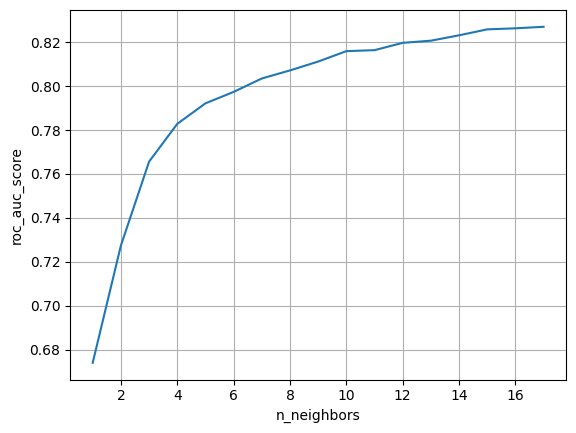

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list_n, list_roc_auc)
plt.xlabel('n_neighbors')
plt.ylabel('roc_auc_score')
plt.grid(visible=True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn_clf.fit(train_data, y=train_target)
print(f"kNN при n_neighbors = 1")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_val, knn_clf.predict_proba(X_val)[:, 1])}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, knn_clf.predict_proba(X_train)[:, 1])}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


kNN при n_neighbors = 1
TEST:  ROC-AUC -- 0.8682698607186616
TRAIN: ROC-AUC -- 0.8728557638168692


Функция сохранения результатов модели для платформы ALL Cups

In [ ]:
def save_array_to_submission(array, name='last_submission'):

    assert array.shape == (2000, 2), 'shape doesnt match'

    df_subm = pd.DataFrame(array, columns=[0,1])

    df_subm[1].to_csv(f'{name}.csv', index=False, header=False)
    return 'ok'

In [ ]:
test_data = pd.read_csv('test.csv', header=None)
predict = knn_clf.predict_proba(test_data)
save_array_to_submission(predict, name='knn_n_15')

'ok'

Используя модель KNN  меняя n_neighbors получили следующие данные

| n_neighbors | roc_auc_score модели 2 | roc_auc на платформе All Cups 3 |
|---------------|----------------------|----------|
| 5             | 0.789                    | 0.762  |
| 10            | 0.818                    | 0.793   |
| 15            | 0.866                    | 0.794   |

## Логистическая регрессия

Загрузка данных

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

train_data = pd.read_csv('train.csv', header=None)
train_target = pd.read_csv('train-target.csv', header=None)[0]

# Разделим данные на обучене и тест (как и раньше со стратификацией по таргету)
X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.25, stratify = train_target, random_state=0)

In [ ]:
# Импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# Содадим объект класса LogisticRegression с параметрами по умолчанию
model_LR = LogisticRegression()
# Обучим его на обучающем датасете
model_LR.fit(X=X_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Расчет метрики

In [ ]:
from sklearn.metrics import roc_auc_score

# Посмотрим  метрику  ROC-AUC
print(f"model_LR")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_val, model_LR.predict_proba(X_val)[:, 1])}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, model_LR.predict_proba(X_train)[:, 1])}")

model_LR
TEST:  ROC-AUC -- 0.99999935993077
TRAIN: ROC-AUC -- 1.0


Сохранение данных для ALL Cups

In [ ]:
test_data = pd.read_csv('test.csv', header=None)
predict = model_LR.predict_proba(test_data)
save_array_to_submission(predict, name='LR')

'ok'

Приводим нашу выборку к нормальному распределению

In [ ]:
# Импортируем класс Normalizer из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import Normalizer
# Отмасштабируем наши признаки
# Создадим объект класса Normalizer
scaler = Normalizer()

# Сделаем .fit() на обучении
scaler.fit(X_train, y_train)

# .transform() на обучении и тесте (возвращает numpy, поэтому надо самим конвертировать обратно в dataframe с нужными индексами колонками)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_val  = pd.DataFrame(scaler.transform(X_val), index=X_val.index, columns=X_val.columns)

In [ ]:
# Построим логистическую регрессию на новых данных

# Содадим объект класса LogisticRegression с параметрами по умолчанию
model_LR = LogisticRegression()

# Обучим его на обучающем датасете
model_LR.fit(X_train, y_train)

# Получим предсказания и посмотрим на долю правильных ответов:
y_pred_test_LR = model_LR.predict(X_val)
y_pred_train_LR = model_LR.predict(X_train)

from sklearn.metrics import roc_auc_score

# Посмотрим  метрику  ROC-AUC
print(f"model_LR")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_val, model_LR.predict_proba(X_val)[:, 1])}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, model_LR.predict_proba(X_train)[:, 1])}")

model_LR
TEST:  ROC-AUC -- 0.6551953459286155
TRAIN: ROC-AUC -- 0.6582344882205149


Сохранение данных для ALL Cups

In [ ]:
test_data = pd.read_csv('test.csv', header=None)
test_data  = pd.DataFrame(scaler.transform(test_data), index=test_data.index, columns=test_data.columns)
predict = model_LR.predict_proba(test_data)
save_array_to_submission(predict, name='LR_normal')

'ok'

В итоге используя логистическую мы получаем худшее значение метрики чем с Knn

## Нейронная сеть

In [ ]:
import os

import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim # для оптимизаторов
from torchvision import datasets # для данных
import torchvision.transforms as transforms # для преобразований тензоров

import matplotlib.pyplot as plt

Загрузим наши данные.

In [ ]:
from torch.utils.data import TensorDataset, Dataset


class CSVDataset(Dataset):
    def __init__(self, x, y=None, transforms=None):
        self.x = x
        self.y = y
        self.transforms = transforms

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        sample_x = self.x[idx]
        if self.y is not None:
          sample_y = self.y[idx]
          return (torch.tensor(sample_x, dtype=torch.float),
                  torch.tensor(sample_y, dtype=torch.float),
                 )
        else:
          sample_y = None
          return (torch.tensor(sample_x, dtype=torch.float), None)


In [ ]:

# Load the data from a CSV file

df_train_data = pd.read_csv('train.csv', header=None).drop ([9, 15, 16], axis= 1)
df_train_target = pd.read_csv('train-target.csv', header=None)

X_train, X_test, y_train, y_test = train_test_split(df_train_data, df_train_target, test_size=0.2)
'''
# Импортируем класс Normalizer из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import Normalizer
# Отмасштабируем наши признаки
scaler = Normalizer()

scaler.fit(X_train, y_train)

# .transform() на обучении и тесте (возвращает numpy, поэтому надо самим конвертировать обратно в dataframe с нужными индексами колонками)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

'''
train_dataset = CSVDataset(X_train.values,
                           y_train.values)

test_dataset = CSVDataset(X_test.values,
                           y_test.values)


trainset = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False)
testset = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

Модель сети

In [ ]:
n_hidden1 = 64
n_hidden2 = 32


class Binary_Class_NET(nn.Module): # наследуемся от класса nn.Module
    def __init__(self):
        super(Binary_Class_NET, self).__init__()

        # первый слой
        self.fc1 = nn.Linear(27, n_hidden1)
        self.fc2 = nn.Linear(n_hidden1, n_hidden2)
        self.fc3 = nn.Linear(n_hidden2, 1)


        self.th = nn.Tanh()
        self.relu = nn.ReLU()
        self.sigmoid =  nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)

        #self.fc4 = nn.Linear(7, 1)
        torch.nn.init.uniform_(self.fc1.weight, -1, 1)
        torch.nn.init.uniform_(self.fc2.weight, -1, 1)
        torch.nn.init.uniform_(self.fc3.weight, -1, 1)
        #torch.nn.init.uniform_(self.fc4.weight, -1, 1)
        #torch.nn.init.uniform_(self.fc5.weight, -1, 1)
        #print(self.fc1.weight)
        #print(self.fc2.weight)
        #print(self.fc3.weight)
        #print(self.fc4.weight)

    def forward(self, inputs):
        x = inputs.view(-1)
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        # x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x
        #return F.log_softmax(x, dim=1)


net = Binary_Class_NET()
print(net)

Binary_Class_NET(
  (fc1): Linear(in_features=27, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (th): Tanh()
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
)


Расчет метрики

In [ ]:
from sklearn.metrics import roc_auc_score

def predict_bin_clas_net(tset=testset):
  net.eval() # переводем модель в режим инференса
  outputs = []
  # показываем, что обученич нет и градиенты не обновляются
  with torch.no_grad():
    for data in tset:  # `data` это батч наших данных,
      X = data[0]  # X это батч свойств, y это батч целевых переменных.
      output = net(X)
      outputs.append(output.item())
  return outputs


def print_roc_auc():
  # Посмотрим  метрику  ROC-AUC
  roc_auc = roc_auc_score(y_true=y_test, y_score=predict_bin_clas_net())
  print(f"TEST:  ROC-AUC -- {roc_auc}")

Выбор оптимизатора и loss функции

In [ ]:
import torch.optim as optim

loss_function = nn.BCELoss()
# loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
# optimizer = optim.SGD(net.parameters(),lr = 0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)
torch.manual_seed(124)

Обучение сети

epoch - 0 loss - 0.4112154245376587
TEST:  ROC-AUC -- 0.766103331238215
epoch - 1 loss - 0.4524688720703125
TEST:  ROC-AUC -- 0.7688970458830924
epoch - 2 loss - 0.20032669603824615
TEST:  ROC-AUC -- 0.7718627278441232
epoch - 3 loss - 0.48169028759002686
TEST:  ROC-AUC -- 0.7773008170961659
epoch - 4 loss - 0.3203635513782501
TEST:  ROC-AUC -- 0.7782315524827152
epoch - 5 loss - 0.12380079925060272
TEST:  ROC-AUC -- 0.7821063482086739


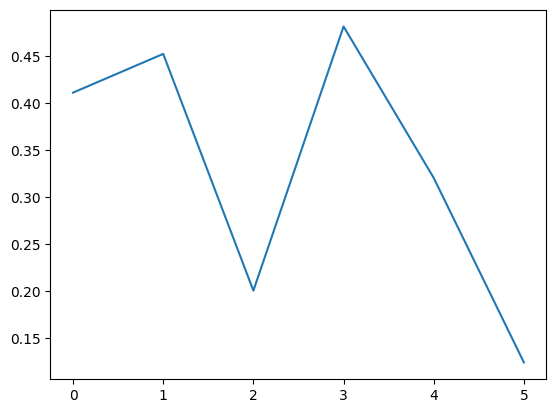

In [ ]:
list_loss = []
for epoch in range(6): # три полных прохода по нашим данным
    net.train() # обязательно переводим в режим обучения
    for X, y in trainset:  # `data` это батч наших данных
        # X, y = data  # X это батч свойств, y это батч целевых переменных.
        #net.zero_grad()  # устанавливаем значение градиента в 0 перед вычислением функции потерь. Вам следует делать это на каждом шаге.
        optimizer.zero_grad()
        output = net(X)  # передаем выпрямленный батч

        loss = loss_function(output, y.view(-1))  # вычисляем функцию потерь
        loss.backward()  # передаем это значение назад по сети
        optimizer.step()  # пытаемся оптимизировать значение весов исходя из потерь и градиента
        #print(output)
        #print(y.view(-1))
        #print('loss', loss)  # выводим на экран значение функции потерь. Мы надеемся, что оно убывает!

    print('epoch -', epoch, 'loss -', loss.item())  # выводим на экран значение функции потерь. Мы надеемся, что оно убывает!
    list_loss.append(loss.item())
    print_roc_auc()

plt.plot(list_loss)
plt.show()


In [ ]:
print_roc_auc()

TEST:  ROC-AUC -- 0.7691426919271398


Сохранение данных для ALL Cups

In [ ]:
def save_array_to_submission(array, name='last_submission'):
    assert len(array) == 2000, 'shape doesnt match'
    df_subm = pd.DataFrame(array, columns=[0])
    df_subm.to_csv(f'{name}.csv', index=False, header=False)
    return 'ok'

In [ ]:
test_data = pd.read_csv('test.csv', header=None).drop ([9, 15, 16], axis= 1)
#test_data = pd.DataFrame(scaler.transform(test_data), index=test_data.index, columns=test_data.columns)
result_test_dataset = CSVDataset(x=test_data.values,
                                 y=y_test.values)
result_testset = torch.utils.data.DataLoader(result_test_dataset, batch_size=1, shuffle=False)

predict = predict_bin_clas_net(result_testset)


save_array_to_submission(predict, name='bc_net9')

'ok'

В итоге используя нейронную сеть мы получаем худшее значение метрики чем с Knn